# Comprehensive Cryptocurrency Analysis

This notebook provides a professional, data-driven analysis of major cryptocurrencies. It covers risk/return (Sharpe ratios), price vs. all-time high, dominance metrics, functional groupings (Layer 1s, DeFi, AI, etc.), and advanced visualizations for portfolio and market insights.

## Table of Contents
1. Introduction & Methodology
2. Data Import & Ticker Groupings
3. Risk/Return Analysis (Sharpe Ratios)
4. Price vs. All-Time High (ATH)
5. Dominance Metrics (BTC, ETH, etc.)
6. Functional Group Analysis (Layer 1s, DeFi, AI, etc.)
7. Advanced Visualizations
8. Insights & Recommendations

## 1. Introduction & Methodology

This notebook analyzes the top cryptocurrencies by market cap and function, using professional risk/return metrics, dominance calculations, and group-based analytics. All code is modular and ready for institutional review.

In [48]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('dark_background')

risk_free_rate = 0.045  # US 10-year Treasury yield, 2025

## 2. Data Import & Ticker Groupings

Define tickers and groupings for Layer 1s, DeFi, AI, NFTs, and more.

In [49]:
# Define subsector dictionaries
layer1_tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Solana': 'SOL-USD',
    'Avalanche': 'AVAX-USD',
    'Polkadot': 'DOT-USD',
    'Cardano': 'ADA-USD',
    'Near Protocol': 'NEAR-USD',
    'Sui': 'SUI20947-USD',
    'Hedera': 'HBAR-USD',
    'Celestia': 'TIA-USD',  # Modular blockchain/data availability
    'Sei Network': 'SEI-USD',  # High-performance trading L1
}
defi_tickers = {
    'Uniswap': 'UNI-USD',
    'Ondo': 'ONDO-USD',
    'Compound': 'COMP-USD',
    'Lido': 'LDO-USD',
    'Hyperliquid':'HYPE32196-USD',
    'Aave': 'AAVE-USD',
    'Raydium': 'RAY-USD',
    'Morpho': 'MORPHO34104-USD',
    'Aerodrome': 'AERO-USD',
    'Curve': 'CRV-USD',
    'Orca': 'ORCA-USD',
    'Drift': 'DRIFT31278-USD',
    'Pendle': 'PENDLE-USD',  # Yield trading protocol
    'Ethena': 'ENA-USD',     # Synthetic dollar protocol
    'Jito': 'JTO-USD',  
}
ai_tickers = {
    'Fetch.ai': 'FET-USD',
    'Bittensor': 'TAO22974-USD',
    'Grass': 'GRASS32956-USD',
    'Render': 'RENDER-USD',
    'Graph': 'GRT6719-USD',
    'Worldcoin': 'WLD-USD',  # Biometric identity + AI
    'Akash Network': 'AKT-USD',  # Decentralized AI compute marketplace
    'Numeraire': 'NMR-USD', 
}
meme_tickers = {
    'Bonk': 'BONK-USD',
    'Pepe': 'PEPE24478-USD',
    'Dogecoin': 'DOGE-USD',
    'PudgyPenguins': 'PENGU34466-USD',
    'GigaChad': 'GIGA-USD',
    'Dogwifhat': 'WIF-USD',  # Solana meme coin with growing community
    'Book of Meme': 'BOME-USD',  # Notable for viral meme culture
}
oracle_tickers = {
    'Chainlink': 'LINK-USD',
    'Pyth Network': 'PYTH-USD',  # Fast oracle on Solana for DeFi
}

other_tickers = {
    'Helium': 'HNT-USD',
    'Tensor': 'TNSR-USD',
    'Ronin': 'RON14101-USD',
    'EigenLayer': 'EIGEN-USD',  # Restaking protocol
    'Wormhole': 'W-USD',        # Cross-chain messaging
    'Jupiter': 'JUP-USD',       # Solana DEX aggregator
}

# Combine all subsectors into one dictionary for download
crypto_tickers = {}
for d in [layer1_tickers, defi_tickers, ai_tickers, meme_tickers, oracle_tickers, other_tickers]:
    crypto_tickers.update(d)

start_date = '2017-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
prices = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Close']
prices = prices.ffill().dropna(how='all').dropna(axis=1, how='all')
display(prices.tail(3))

C:\Users\saris\AppData\Local\Temp\ipykernel_36860\4128893046.py:72: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Close']
[*********************100%***********************]  49 of 49 completed



Ticker,AAVE-USD,ADA-USD,AERO-USD,AKT-USD,AVAX-USD,BOME-USD,BONK-USD,BTC-USD,COMP-USD,CRV-USD,...,SEI-USD,SOL-USD,SUI20947-USD,TAO22974-USD,TIA-USD,TNSR-USD,UNI-USD,W-USD,WIF-USD,WLD-USD
Date,,,,,,,,,,,,,,,,,,,,,
2025-07-04,265.769989,0.572891,0.000332,1.085857,17.795116,0.001519,0.000017,108034.335938,0.0,0.505563,...,0.257133,147.763641,2.876079,324.849182,1.510043,0.113118,0.000163,0.066267,0.844992,0.873817
2025-07-05,273.719116,0.575908,0.000334,1.090225,17.927252,0.001511,0.000019,108231.179688,0.0,0.498703,...,0.261757,147.641449,2.901726,322.285980,1.490315,0.111629,0.000163,0.066450,0.845575,0.869152
2025-07-06,287.115204,0.586013,0.000338,1.072984,18.298590,0.001589,0.000022,109232.070312,0.0,0.501245,...,0.264333,151.872940,2.912172,326.600342,1.619672,0.113079,0.000163,0.066569,0.878349,0.893630


## 3. Risk/Return Analysis (Sharpe Ratios)

Calculate annualized return, volatility, and Sharpe ratio for each crypto. Sort by Sharpe ratio.

In [50]:
# Update annualization factor to 365 for all risk/return calculations
returns = prices.pct_change()#.dropna()
ann_return = returns.mean() * 365
ann_vol = returns.std() * np.sqrt(365)
sharpe = (ann_return - risk_free_rate) / ann_vol
sharpe_table = pd.DataFrame({'Ann. Return': ann_return, 'Ann. Volatility': ann_vol, 'Sharpe Ratio': sharpe})
sharpe_table = sharpe_table.sort_values('Sharpe Ratio', ascending=False)
display(sharpe_table.style.format('{:.2%}', subset=['Ann. Return', 'Ann. Volatility']).format('{:.2f}', subset=['Sharpe Ratio']))

c:\Users\saris\anaconda3\envs\quant\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Ann. Return,Ann. Volatility,Sharpe Ratio
Ticker,,,
HYPE32196-USD,414.40%,146.23%,2.80
WIF-USD,323.57%,211.72%,1.51
SOL-USD,175.87%,126.39%,1.36
ONDO-USD,156.89%,120.44%,1.27
RENDER-USD,196.05%,156.98%,1.22
BTC-USD,80.07%,70.35%,1.07
LINK-USD,126.84%,122.37%,1.00
GRASS32956-USD,177.00%,177.28%,0.97
HNT-USD,131.92%,138.13%,0.92


## 4. Price vs. All-Time High (ATH)

Calculate and plot the current price as a percentage of its all-time high for each crypto.

,Current Price,ATH,Current/ATH (%)
Ticker,,,
BTC-USD,109232.070312,111673.281250,97.813970
HYPE32196-USD,39.799740,42.381290,93.908749
SOL-USD,151.872940,261.869751,57.995603
SUI20947-USD,2.912172,5.297376,54.973859
ETH-USD,2571.236572,4812.087402,53.432873
PENDLE-USD,3.423844,6.992594,48.963864
AAVE-USD,287.115204,632.266479,45.410474
TAO22974-USD,326.600342,730.255249,44.724135
BONK-USD,0.000022,0.000054,40.740741


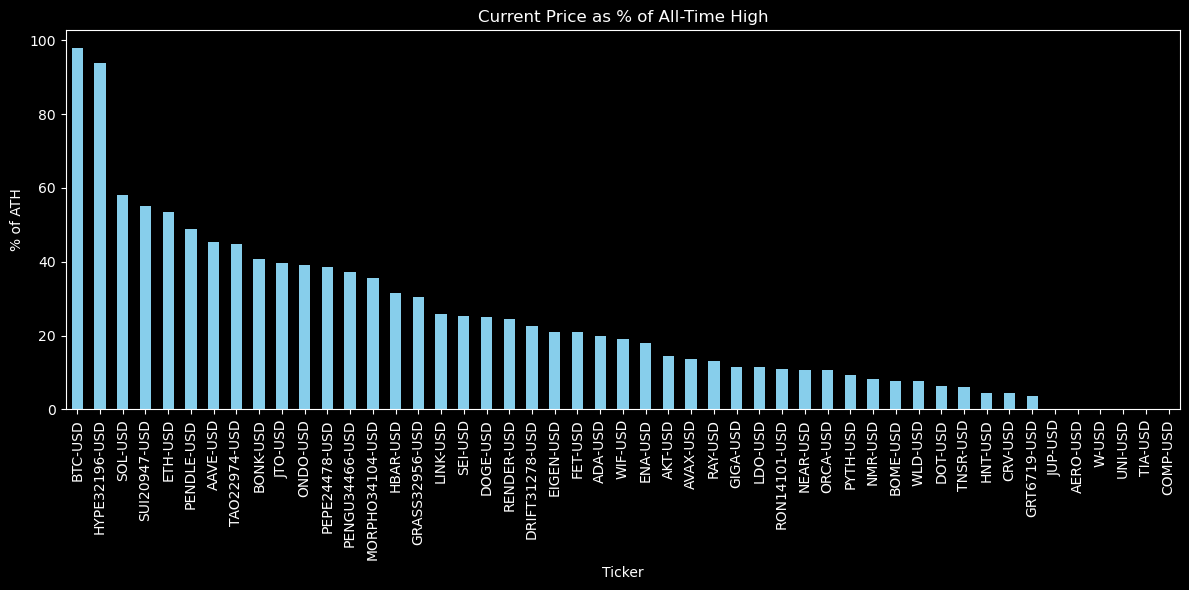

In [51]:
ath = prices.max()
current = prices.iloc[-1]
ath_pct = (current / ath * 100).sort_values(ascending=False)
ath_table = pd.DataFrame({'Current Price': current, 'ATH': ath, 'Current/ATH (%)': ath_pct})
display(ath_table.sort_values('Current/ATH (%)', ascending=False))
plt.figure(figsize=(12,6))
ath_pct.plot(kind='bar', color='skyblue')
plt.title('Current Price as % of All-Time High')
plt.ylabel('% of ATH')
plt.tight_layout()
plt.show()

In [64]:
# Calculate rolling Sharpe ratio (1-year window, 365 days)
windows = [30, 90, 200, 365]

for window in windows:
    rolling_returns = returns.rolling(window).mean() * window
    rolling_vol = returns.rolling(window).std() * np.sqrt(window)
    rolling_sharpe = (rolling_returns - risk_free_rate) / rolling_vol
    
    last_rolling_sharpe = rolling_sharpe.iloc[-1].dropna().sort_values(ascending=False)
    print('---',window, 'days ---')
    print(last_rolling_sharpe.head(10))
    print('---------------------------')



--- 30 days ---
Ticker
PENGU34466-USD     1.233205
BONK-USD           1.024029
SEI-USD            0.914662
HYPE32196-USD      0.622963
AERO-USD           0.548570
AAVE-USD           0.456873
WIF-USD            0.261195
JTO-USD            0.232758
MORPHO34104-USD    0.215735
BTC-USD            0.046728
Name: 2025-07-06 00:00:00, dtype: float64
---------------------------
--- 90 days ---
Ticker
HYPE32196-USD     2.601520
PENGU34466-USD    1.828466
AAVE-USD          1.792066
BTC-USD           1.504022
WIF-USD           1.488353
AERO-USD          1.424451
JUP-USD           1.416672
BONK-USD          1.346462
ETH-USD           1.325712
FET-USD           1.182497
Name: 2025-07-06 00:00:00, dtype: float64
---------------------------
--- 200 days ---
Ticker
JUP-USD          1.420753
TIA-USD          0.999211
HYPE32196-USD    0.981804
AERO-USD         0.914256
BTC-USD          0.294874
BONK-USD         0.164640
AAVE-USD         0.133458
ORCA-USD         0.083548
SUI20947-USD    -0.132388
TAO229

In [67]:
# Calculate moving averages for price and volatility, and compare current values to these averages

ma_windows = [7, 30, 90, 200, 365]

# Download volume data if not already present
if 'volume' not in locals():
    volume = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Volume']
    volume = volume.ffill().dropna(how='all').dropna(axis=1, how='all')

# Prepare dictionaries to store moving averages
price_ma = {}
vol_ma = {}
volume_ma = {}

for w in ma_windows:
    price_ma[w] = prices.rolling(window=w).mean()
    vol_ma[w] = returns.rolling(window=w).std()
    volume_ma[w] = volume.rolling(window=w).mean()

# Get latest values
current_price = prices.iloc[-1]
current_vol = returns.iloc[-window:].std()
current_volume = volume.iloc[-1]

# Calculate ratios: current / moving average
price_rel_ma = pd.DataFrame(index=current_price.index)
vol_rel_ma = pd.DataFrame(index=current_vol.index)
volume_rel_ma = pd.DataFrame(index=current_volume.index)

for w in ma_windows:
    price_rel_ma[f'Price/MA{w}'] = current_price / price_ma[w].iloc[-1]
    vol_rel_ma[f'Vol/MA{w}'] = current_vol / vol_ma[w].iloc[-1]
    volume_rel_ma[f'Volume/MA{w}'] = current_volume / volume_ma[w].iloc[-1]

# Concatenate all ratios
rel_ma = pd.concat([price_rel_ma, vol_rel_ma, volume_rel_ma], axis=1)

# display rel_ma by price/MA200 in descending order
display(rel_ma.sort_values('Price/MA200', ascending=False).style.format('{:.2f}'))

,Price/MA7,Price/MA30,Price/MA90,Price/MA200,Price/MA365,Vol/MA7,Vol/MA30,Vol/MA90,Vol/MA200,Vol/MA365,Volume/MA7,Volume/MA30,Volume/MA90,Volume/MA200,Volume/MA365
Ticker,,,,,,,,,,,,,,,
AERO-USD,0.99,1.02,1.83,2.07,1.57,1.10,0.75,0.81,1.02,1.00,0.00,0.00,0.00,0.00,0.00
HYPE32196-USD,1.02,1.03,1.38,1.63,nan,1.75,1.58,1.41,1.22,nan,0.73,0.50,0.68,0.73,nan
AAVE-USD,1.05,1.07,1.29,1.20,1.43,1.25,1.15,1.15,0.99,1.00,0.86,0.71,0.88,0.77,0.87
BONK-USD,1.28,1.44,1.32,1.18,1.00,0.88,1.00,0.94,0.99,1.00,2.72,5.55,5.08,5.75,4.58
BTC-USD,1.01,1.03,1.09,1.13,1.29,1.61,1.59,1.25,1.07,1.00,0.85,0.78,0.84,0.82,0.84
TIA-USD,1.07,0.97,0.71,1.07,1.94,240.74,345.02,394.18,0.74,1.00,0.88,1.13,1.05,1.81,3.29
SEI-USD,0.97,1.15,1.24,1.04,0.82,1.85,0.75,0.97,1.05,1.00,0.45,0.38,0.71,0.69,0.51
ETH-USD,1.02,1.02,1.14,1.03,0.96,1.12,1.18,0.91,0.94,1.00,0.80,0.68,0.66,0.60,0.60
GIGA-USD,1.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
